In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm

from sklearn.datasets.samples_generator import make_blobs
#we can create our own data using make_blobs which generates gaussian blobs for clustering

x,y = make_blobs(n_samples = 40, centers = 2 , random_state = 20)
#if n_samples is int- then it equally divides pt. across cluster, here it creates 20 pt. for each cluster
#if n_sample is array then each arr. elem. indicates no of sample per cluster

#here in x we store 40 co.ord. val of x-axis and y axis and in y we store its color labels as 0/1

clf = svm.SVC(kernel = 'linear', C=1)
# here we are creting a linear SVM so all data points can easily be separated by simple st. hyperplane
# C determines the regularization of parameters and strength  is inv. proportional to C

clf.fit(x,y)
# this creates our model with a hyperplane passing for max. margin b/w 2 support vectors


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

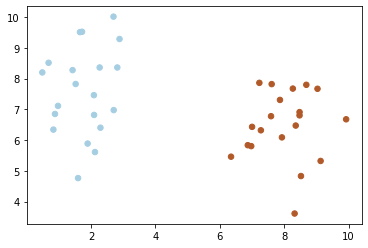

In [4]:
#displaying the data using scatter-plot
plt.scatter(x[:,0], x[:,1], c=y, s=30 , cmap = plt.cm.Paired)
#using x[:,0] we are printing all x-coord. val and with x[:,1] all y-coord. val

plt.show()

In [9]:
print(x)
print(len(x))
print(y)

[[ 1.71842122  9.52190711]
 [ 9.13204399  5.32194764]
 [ 8.68770841  7.79789319]
 [ 2.8137247   8.36064298]
 [ 7.27542879  6.31825811]
 [ 0.48311336  8.19998973]
 [ 7.9294032   6.08842852]
 [ 2.69548237 10.01411256]
 [ 2.26571286  8.36068903]
 [ 0.82767806  6.34128434]
 [ 0.87712287  6.84969507]
 [ 6.86839861  5.83429863]
 [ 0.97059923  7.11190662]
 [ 2.12015254  5.61101265]
 [ 2.88274828  9.28705277]
 [ 8.47704476  6.80415251]
 [ 7.61095347  7.8201477 ]
 [ 1.65359865  9.510461  ]
 [ 2.08607703  7.46086368]
 [ 9.92527993  6.67617854]
 [ 2.09222936  6.81774802]
 [ 1.59396992  4.76457177]
 [ 0.67778343  8.51397085]
 [ 7.86880706  7.3062361 ]
 [ 8.32405183  3.6123843 ]
 [ 8.35834306  6.47258777]
 [ 2.28968574  6.40317382]
 [ 6.34822954  5.46058533]
 [ 7.22830657  7.86147791]
 [ 8.47764867  6.90996676]
 [ 1.89139437  5.88732584]
 [ 8.26863909  7.67453856]
 [ 1.42412542  8.27524534]
 [ 2.70208537  6.97579352]
 [ 8.52161671  4.83102994]
 [ 7.00192182  6.43079715]
 [ 9.03512586  7.66854573]
 

In [10]:
#using to predict unknown data
newdata = [[3,4],[5,6]]
print(clf.predict(newdata))

[0 1]


### Backend working of hyperplane and margin

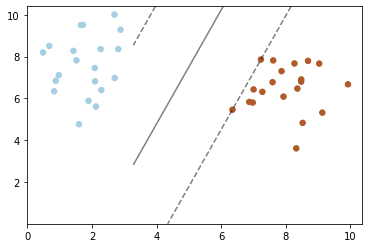

In [16]:
#fit the model, dont regularize for illustration and creating the same scatterplot with hyperplane and margin
clf = svm.SVC(kernel = 'linear', C=1000)
clf.fit(x,y)
plt.scatter(x[:,0], x[:,1], c=y, s=30 , cmap = plt.cm.Paired)

#plot the decision function and we are using reference (ax) to done various thing in that same graph
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30) #gives 30 evenly spaced pt. b/w 0th and 1st index
yy = np.linspace(ylim[0], ylim[1], 30)

XX,YY = np.meshgrid(yy,xx) # this creates fine grids between x,y 30 points

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

#plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels = [-1,0,1], alpha=0.5, linestyles = ['--','-','--'])


#plot support vectors
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100, linewidth=10, facecolors = 'none')

plt.show()